In [ ]:
# 한글 깨짐 방지를 위한 나눔 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

# 세션 다시 시작

Password:
sudo: a password is required
Password:

In [ ]:
import pandas as pd
import json
import numpy as np
import folium
from folium import plugins
import matplotlib.pyplot as plt
import seaborn as sns
import io
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
plt.rc('font', family='NanumBarunGothic')

In [4]:
df = pd.read_csv('/content/drive/MyDrive/★2조/버전관리/CSV/data(ver.4.1)_한솔.csv', index_col=0)
df.head()


,지역구,동,계약년,계약월,계약일,전용면적(㎡),층,건축연도,공공체육시설(개소),공원면적(천㎡),...,흡연율(%),월간음주율(%),비만율(%),건강생활실천율(%),인플루엔자 접종률(%),연간출산율(%),등록외국인현황(명),다문화가구(가구),다문화가구원(명),거래금액(만원)
0,강남구,개포동,2022,12,23,49.8600,4,1992,293,7794.1,...,11.8,60.2,25.9,49.4,47.9,0.49,5001,2384,7041,104000
1,강남구,개포동,2022,12,23,49.8600,4,1992,293,7794.1,...,11.8,60.2,25.9,49.4,47.9,0.49,5001,2384,7041,104000
2,강남구,개포동,2022,12,22,76.1709,24,2019,293,7794.1,...,11.8,60.2,25.9,49.4,47.9,0.49,5001,2384,7041,220000
3,강남구,개포동,2022,12,17,83.2100,3,1983,293,7794.1,...,11.8,60.2,25.9,49.4,47.9,0.49,5001,2384,7041,190000
4,강남구,개포동,2022,12,16,51.1200,15,1992,293,7794.1,...,11.8,60.2,25.9,49.4,47.9,0.49,5001,2384,7041,100000


In [5]:
cols = df.select_dtypes(exclude='object').columns
cols = cols.drop('거래금액(만원)')

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols] = scaler.fit_transform(df[cols])

df.head()


,지역구,동,계약년,계약월,계약일,전용면적(㎡),층,건축연도,공공체육시설(개소),공원면적(천㎡),...,흡연율(%),월간음주율(%),비만율(%),건강생활실천율(%),인플루엔자 접종률(%),연간출산율(%),등록외국인현황(명),다문화가구(가구),다문화가구원(명),거래금액(만원)
0,강남구,개포동,1.0,1.0,0.733333,0.096162,0.109589,0.500000,1.0,0.442545,...,0.038462,0.752688,0.299465,0.549133,0.802419,0.091031,0.080465,0.193625,0.246538,104000
1,강남구,개포동,1.0,1.0,0.733333,0.096162,0.109589,0.500000,1.0,0.442545,...,0.038462,0.752688,0.299465,0.549133,0.802419,0.091031,0.080465,0.193625,0.246538,104000
2,강남구,개포동,1.0,1.0,0.700000,0.159669,0.383562,0.935484,1.0,0.442545,...,0.038462,0.752688,0.299465,0.549133,0.802419,0.091031,0.080465,0.193625,0.246538,220000
3,강남구,개포동,1.0,1.0,0.533333,0.176659,0.095890,0.354839,1.0,0.442545,...,0.038462,0.752688,0.299465,0.549133,0.802419,0.091031,0.080465,0.193625,0.246538,190000
4,강남구,개포동,1.0,1.0,0.500000,0.099203,0.260274,0.500000,1.0,0.442545,...,0.038462,0.752688,0.299465,0.549133,0.802419,0.091031,0.080465,0.193625,0.246538,100000


In [6]:
from sklearn.preprocessing import LabelEncoder
cols = ['지역구', '동']
for col in cols:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 632731 entries, 0 to 632730
Data columns (total 49 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   지역구                      632731 non-null  int64  
 1   동                        632731 non-null  int64  
 2   계약년                      632731 non-null  float64
 3   계약월                      632731 non-null  float64
 4   계약일                      632731 non-null  float64
 5   전용면적(㎡)                  632731 non-null  float64
 6   층                        632731 non-null  float64
 7   건축연도                     632731 non-null  float64
 8   공공체육시설(개소)               632731 non-null  float64
 9   공원면적(천㎡)                 632731 non-null  float64
 10  경찰 및 소방관서(개소)            632731 non-null  float64
 11  전체병원(개소)                 632731 non-null  float64
 12  종합병원(개소)                 632731 non-null  float64
 13  노인여가복지시설(개소)  632731 non-null  float64
 14  초등학교

In [7]:
df.head()

,지역구,동,계약년,계약월,계약일,전용면적(㎡),층,건축연도,공공체육시설(개소),공원면적(천㎡),...,흡연율(%),월간음주율(%),비만율(%),건강생활실천율(%),인플루엔자 접종률(%),연간출산율(%),등록외국인현황(명),다문화가구(가구),다문화가구원(명),거래금액(만원)
0,0,8,1.0,1.0,0.733333,0.096162,0.109589,0.500000,1.0,0.442545,...,0.038462,0.752688,0.299465,0.549133,0.802419,0.091031,0.080465,0.193625,0.246538,104000
1,0,8,1.0,1.0,0.733333,0.096162,0.109589,0.500000,1.0,0.442545,...,0.038462,0.752688,0.299465,0.549133,0.802419,0.091031,0.080465,0.193625,0.246538,104000
2,0,8,1.0,1.0,0.700000,0.159669,0.383562,0.935484,1.0,0.442545,...,0.038462,0.752688,0.299465,0.549133,0.802419,0.091031,0.080465,0.193625,0.246538,220000
3,0,8,1.0,1.0,0.533333,0.176659,0.095890,0.354839,1.0,0.442545,...,0.038462,0.752688,0.299465,0.549133,0.802419,0.091031,0.080465,0.193625,0.246538,190000
4,0,8,1.0,1.0,0.500000,0.099203,0.260274,0.500000,1.0,0.442545,...,0.038462,0.752688,0.299465,0.549133,0.802419,0.091031,0.080465,0.193625,0.246538,100000


<Axes: >

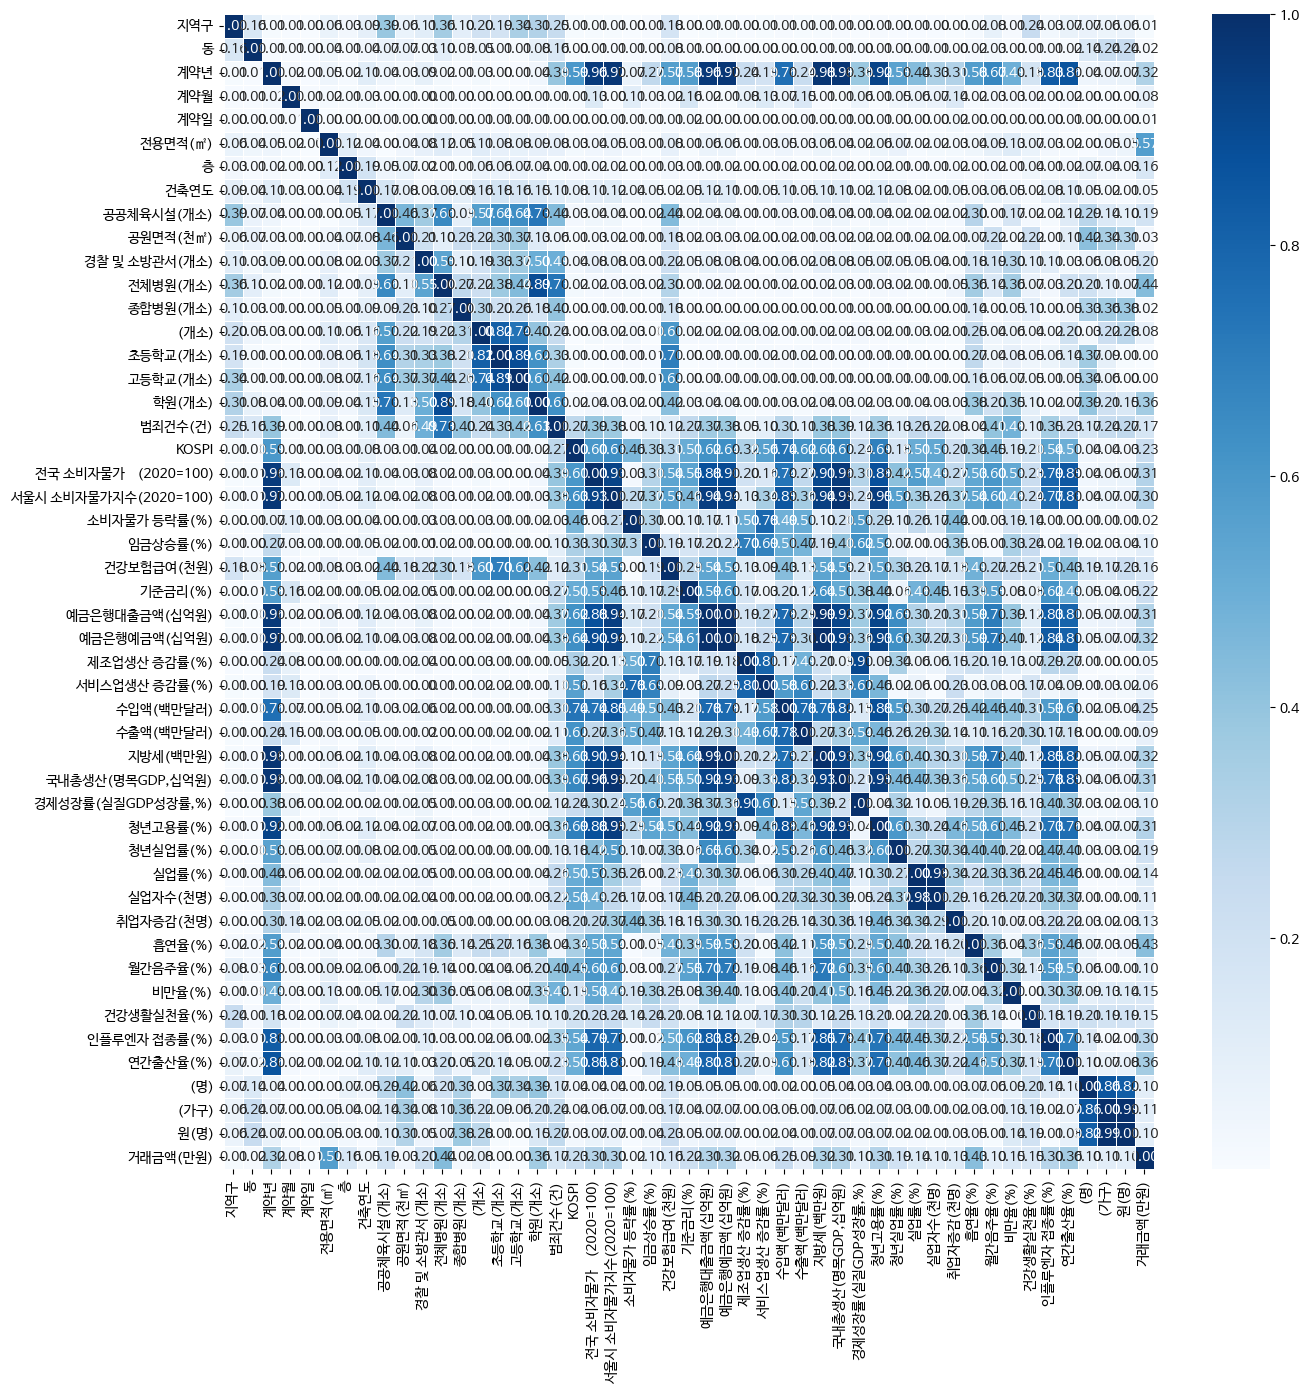

In [8]:
# 피어슨 상관계수 절대값으로 분석

plt.figure(figsize=(15,15)) # 사이즈 30,30 시도해볼 것
sns.heatmap(data = abs(df.corr(method='pearson')), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues') # 소수점 한자리까지만


In [9]:
df_corr = df.corr()
df_corr['거래금액(만원)'] = abs(df_corr['거래금액(만원)'])
df_corr = df_corr.sort_values('거래금액(만원)', ascending=False)

df_corr.iloc[:,-1]

거래금액(만원)                   1.000000
전용면적(㎡)                    0.571715
전체병원(개소)                   0.440482
흡연율(%)                     0.426387
학원(개소)                     0.361336
연간출산율(%)                   0.357892
계약년                        0.318050
지방세(백만원)                   0.316694
예금은행예금액(십억원)               0.316157
예금은행대출금액(십억원)              0.311163
국내총생산(명목GDP,십억원)           0.308896
청년고용률(%)                   0.307530
전국 소비자물가지수(2020=100)     0.306040
서울시 소비자물가지수(2020=100)      0.304805
인플루엔자 접종률(%)               0.295342
수입액(백만달러)                  0.246821
KOSPI                      0.229763
기준금리(%)                    0.217209
경찰 및 소방관서(개소)              0.204764
청년실업률(%)                   0.192321
공공체육시설(개소)                 0.190079
범죄건수(건)                    0.165876
건강보험급여(천원)                 0.161331
층                          0.158397
건강생활실천율(%)                 0.154474
비만율(%)                     0.146004
실업률(%)                     0.135464
취업자증감(천명)                  0

In [10]:
df['계약년'].unique()

array([1.        , 0.85714286, 0.71428571, 0.57142857, 0.42857143,
       0.28571429, 0.14285714, 0.        ])

In [11]:
# train test 나누기
X_tr = df[df['계약년']<=0.6].drop('거래금액(만원)', axis=1)
X_test = df[df['계약년']>=0.6].drop('거래금액(만원)', axis=1)
y_tr = df[df['계약년']<0.6]['거래금액(만원)']
y_test = df[df['계약년']>=0.6]['거래금액(만원)']

X_tr.head()
y_tr.head()

X_tr.shape, X_test.shape, y_tr.shape, y_test.shape

((492392, 48), (140339, 48), (492392,), (140339,))

In [12]:
y_tr.head(), y_test.head()

(140339    255000
 140340    169000
 140341    249000
 140342    335000
 140343    270000
 Name: 거래금액(만원), dtype: int64,
 0    104000
 1    104000
 2    220000
 3    190000
 4    100000
 Name: 거래금액(만원), dtype: int64)

In [ ]:
# 모델링
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=0, n_estimators=300)
model.fit(X_tr, y_tr)
pred = model.predict(X_test)
pred

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# print('accuracy', accuracy_score(pred, y_test))
print('mse', mean_squared_error(pred, y_test))
print('r2', r2_score(pred, y_test))


